In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from scipy import stats
%matplotlib inline


In [2]:
train_data=pd.read_csv("C:/Users/praneetha/Downloads/project/credit card/train.csv")

In [3]:
test_data=pd.read_csv("C:/Users/praneetha/Downloads/project/credit card/test.csv")

### Train DataSet

In [4]:
print("The Training Data")
train_data.head()

The Training Data


,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


### Test DataSet

In [5]:
print("The Testing Data")
test_data.head()

The Testing Data


,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


### Size of Train & Test DataSets

In [6]:
print("The Training Data Size is: {}".format(train_data.shape))
print("The Testing Data Size is: {}".format(test_data.shape))


The Training Data Size is: (590, 17)
The Testing Data Size is: (100, 16)


### Description of Train Data Set

In [7]:
train_data.describe()

,Key,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,4.609390,2.088534,2.045763,918.706780
std,170.462606,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,7.000000,2.500000,2.000000,363.000000
max,590.000000,26.335000,20.000000,20.000000,100000.000000


### Description of Test DataSet

In [8]:
test_data.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,33.359400,5.639800,3.019150,4.490000,174.170000,1599.590000
std,29.011492,11.521954,5.624441,4.039917,8.824318,159.721225,6185.926674
min,1.000000,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.397500,1.000000,0.500000,0.000000,0.000000,0.000000
50%,50.500000,30.705000,4.125000,1.667500,1.000000,142.500000,26.000000
75%,75.250000,41.252500,9.508750,4.376250,6.000000,260.000000,509.250000
max,100.000000,58.670000,28.000000,28.500000,67.000000,711.000000,50000.000000


## Missing Value Assessment

In [9]:
train_data.replace('?', np.NaN, inplace = True)
test_data.replace('?', np.NaN, inplace = True)

In [10]:
#missing value counts in each of these columns
miss = train_data.isnull().sum()/len(train_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Married           0.010169
BankCustomer      0.010169
EducationLevel    0.015254
Ethnicity         0.015254
Male              0.018644
Age               0.020339
ZipCode           0.022034
dtype: float64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              579 non-null object
Age               578 non-null object
Debt              590 non-null float64
Married           584 non-null object
BankCustomer      584 non-null object
EducationLevel    581 non-null object
Ethnicity         581 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           577 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [12]:
train_data["Age"] = pd.to_numeric(train_data["Age"])
test_data["Age"] = pd.to_numeric(train_data["Age"])

## Exploratory Data Analysis

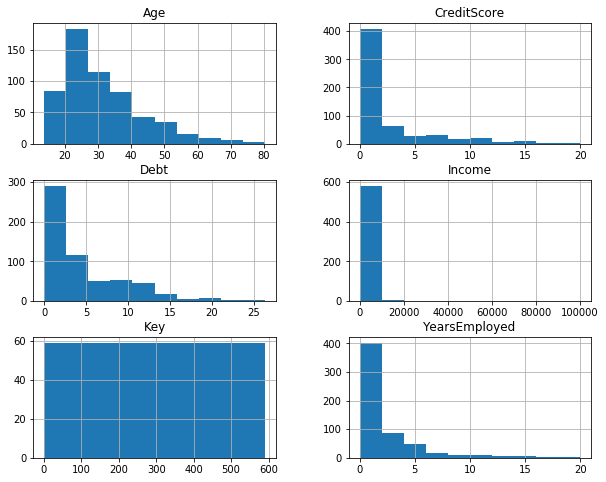

In [13]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
train_data.hist()
plt.show()

In [14]:
numeric_data = train_data.select_dtypes(include=[np.number])

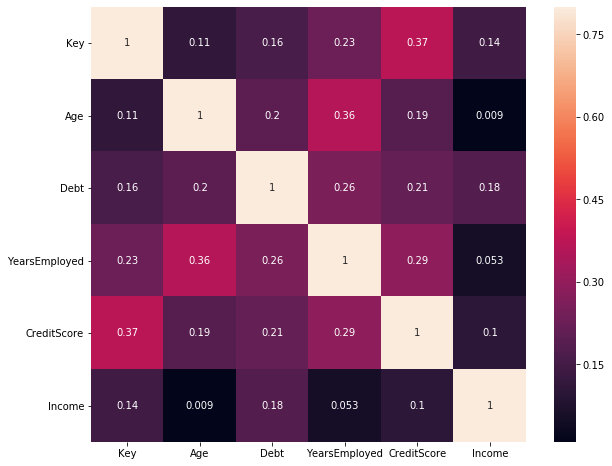

In [15]:
corr = numeric_data.corr()
sns.heatmap(corr,vmax=.8, square=True,annot=True)

C:\Users\praneetha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


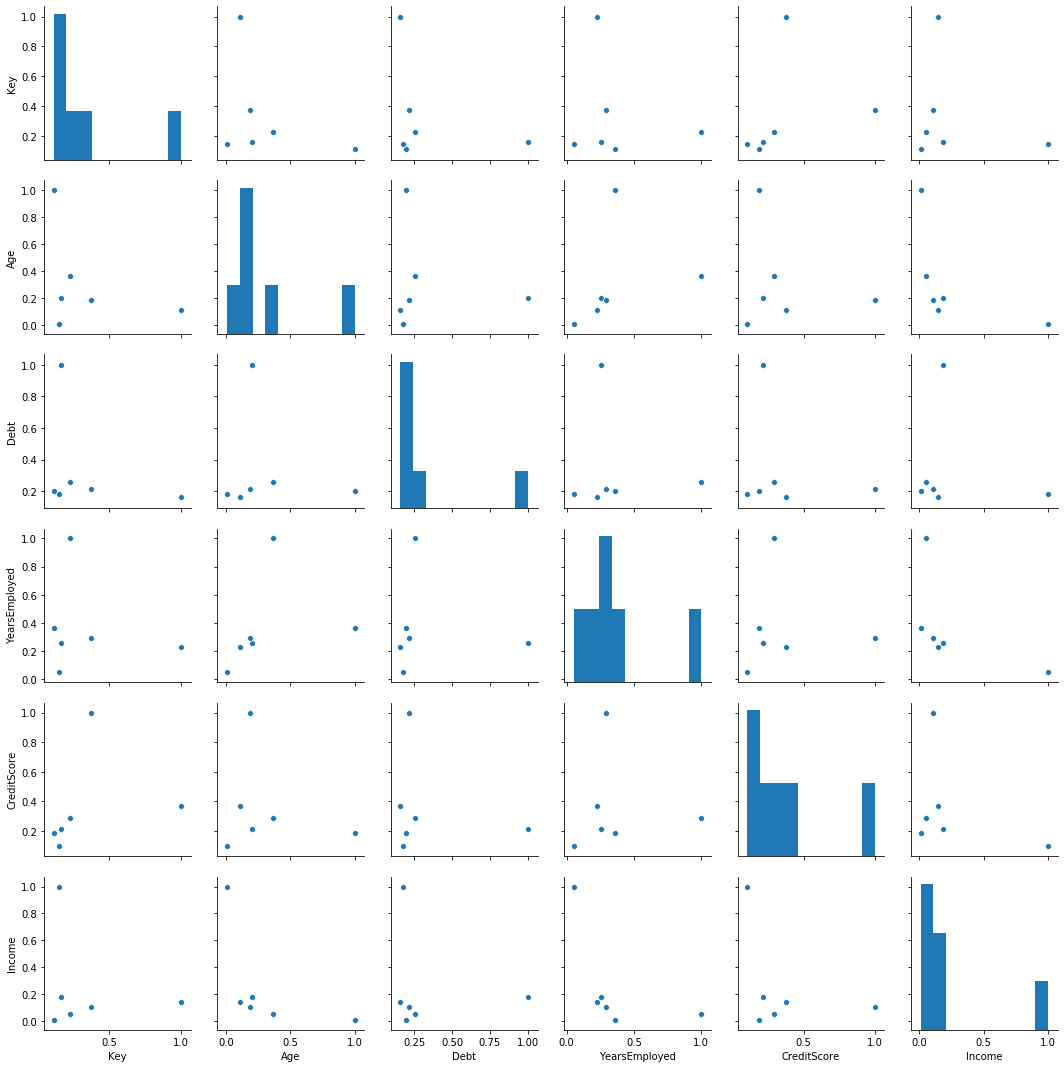

In [16]:
sns.pairplot(corr, size = 2.5)
plt.show();

## Transform Data Into Desired Format

In [17]:
train_data['Male']=train_data['Male'].map({'a':1,'b':2})
test_data['Male']=train_data['Male'].map({'a':1,'b':2})

In [18]:
replace_Married = {'u': 1, 'y': 2, 'l': 3}
train_data['Married'] = train_data['Married'].map(replace_Married)
test_data['Married'] = test_data['Married'].map(replace_Married)

In [19]:
replace_BankCustomer = {'g': 1, 'p': 2, 'gg': 3}
train_data['BankCustomer'] = train_data['BankCustomer'].map(replace_BankCustomer)
test_data['BankCustomer'] = test_data['BankCustomer'].map(replace_BankCustomer)

In [20]:
from sklearn import preprocessing
educationlevel_encoder = preprocessing.LabelEncoder()
train_data['EducationLevel']= educationlevel_encoder.fit_transform(train_data['EducationLevel'].astype(str))
test_data['EducationLevel']= educationlevel_encoder.fit_transform(test_data['EducationLevel'].astype(str))

In [21]:
from sklearn import preprocessing
ethnicity_encoder = preprocessing.LabelEncoder()
train_data['Ethnicity']= ethnicity_encoder.fit_transform(train_data['Ethnicity'].astype(str))
test_data['Ethnicity']= ethnicity_encoder.fit_transform(test_data['Ethnicity'].astype(str))

In [22]:
train_data['Approved']=train_data['Approved'].map({'+':1,'-':0})
test_data['Approved']=train_data['Approved'].map({'+':1,'-':0})

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train_data:
    if train_data[col].dtypes=='object':
        train_data[col]=le.fit_transform(train_data[col].astype('str'))

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test_data:
    if test_data[col].dtypes=='object':
        test_data[col]=le.fit_transform(test_data[col].astype('str'))

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              579 non-null float64
Age               578 non-null float64
Debt              590 non-null float64
Married           584 non-null float64
BankCustomer      584 non-null float64
EducationLevel    590 non-null int32
Ethnicity         590 non-null int32
YearsEmployed     590 non-null float64
PriorDefault      590 non-null int32
Employed          590 non-null int32
CreditScore       590 non-null int64
DriversLicense    590 non-null int32
Citizen           590 non-null int32
ZipCode           590 non-null int32
Income            590 non-null int64
Approved          590 non-null int64
dtypes: float64(6), int32(7), int64(4)
memory usage: 62.3 KB


In [26]:
train_data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
train_data.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,0.0,40.83,3.500,1.0,1.0,6,0,0.500,0,0,0,0,2,6,0,0
1,2,0.0,32.25,1.500,1.0,1.0,1,8,0.250,0,0,0,1,0,95,122,0
2,3,0.0,28.17,0.585,1.0,1.0,0,8,0.040,0,0,0,0,0,63,1004,0
3,4,0.0,29.75,0.665,1.0,1.0,13,8,0.250,0,0,0,1,0,75,0,0
4,5,0.0,26.50,2.710,2.0,2.0,10,6,0.085,0,0,0,0,2,144,0,0


In [29]:
test_data.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,0.0,40.83,0.04,2,2,8,3,0.040,0,0,0,0,0,0,0,0.0
1,2,0.0,32.25,11.75,1,1,1,3,0.250,0,0,0,1,0,180,0,0.0
2,3,0.0,28.17,0.54,1,1,1,3,1.750,0,1,1,1,0,80,5,0.0
3,4,0.0,29.75,0.50,1,1,3,2,0.085,0,0,0,1,1,252,0,0.0
4,5,0.0,26.50,2.04,2,2,5,1,1.500,0,0,0,0,0,120,1,0.0


## Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split
X=train_data.drop('Approved',axis=1)
y=train_data['Approved']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.169,random_state=0)

In [31]:
X_train.shape

(490, 16)

In [32]:
X_test.shape

(100, 16)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n' + str(confusion_matrix(y_test,y_pred)))
print('F1 Score:' + str(f1_score(y_test,y_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
Confusion Matrix: 
[[58  0]
 [ 0 42]]
F1 Score:1.0


In [35]:
print("True:",y_test.values[0:25])
print("Pred:",y_pred[0:25])

True: [0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1]
Pred: [0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1]


## Submission

In [36]:
sub = pd.DataFrame({'hmid':test_data.Key,'predicted_category':y_pred})
sub.head()

,hmid,predicted_category
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [38]:
sub['predicted_category']=sub['predicted_category'].map({1:'+', 0:'-'})

In [39]:
sub.head()

,hmid,predicted_category
0,1,-
1,2,-
2,3,-
3,4,+
4,5,-


In [40]:
sub.to_csv("card_approved_submission.csv",index=False)